# 1. Johdanto

Tavoitteena tehdä malli, joka jakaa kasvaimen hyvän ja pahanlaatuiseksi tiedon perusteella.

# 2. Tiedon ymmärtäminen

In [93]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
df = breast_cancer_wisconsin_diagnostic.data.original
print(f'columns: {len(df.columns.tolist())}')
print(f'rows: {len(df)}')
df.info()



columns: 32
rows: 569
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   radius1             569 non-null    float64
 2   texture1            569 non-null    float64
 3   perimeter1          569 non-null    float64
 4   area1               569 non-null    float64
 5   smoothness1         569 non-null    float64
 6   compactness1        569 non-null    float64
 7   concavity1          569 non-null    float64
 8   concave_points1     569 non-null    float64
 9   symmetry1           569 non-null    float64
 10  fractal_dimension1  569 non-null    float64
 11  radius2             569 non-null    float64
 12  texture2            569 non-null    float64
 13  perimeter2          569 non-null    float64
 14  area2               569 non-null    float64
 15  smoothness2         569 non-null   

Data sisältää ID:n pois lukien <br>
30 float tyypin arvoa kasvaimeen liittyen. <br>
Diagnosis kertoo onko kasvain hyvän- vai pahanlaatuinen.

# 3. Tiedon valmistelu

In [ ]:
# Poistetaan ID-sarake
df = df.drop(columns=['ID'])

# Jaetaan arvot ja diagnoosit omiin muuttujiin.
X = df.drop(columns = 'Diagnosis')
y = df['Diagnosis']

# Skaalataan muuttujat
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 4. Mallinnus

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)
for i in range(1, 8):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)
    print(f'k={i}, Testi setin tarkkuus: {accuracy_test:.6f}')

k=1, Testi setin tarkkuus: 0.959064
k=2, Testi setin tarkkuus: 0.970760
k=3, Testi setin tarkkuus: 0.982456
k=4, Testi setin tarkkuus: 0.976608
k=5, Testi setin tarkkuus: 0.976608
k=6, Testi setin tarkkuus: 0.964912
k=7, Testi setin tarkkuus: 0.970760


Valitaan Knn naapureiden arvoksi 3, sillä on suurin tarkkuus testattaessa. Laskemalla arvoa tarkkuus heikkenee, kuin myös nostaessa.

In [96]:
model = KNeighborsClassifier(n_neighbors = 3)

# 5. Arviointi

In [97]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred)
precision_score_test = precision_score(y_test, y_pred, pos_label='M')
recall_score_test = recall_score(y_test, y_pred, pos_label='M')
print(f'Testi setin accuracy: {accuracy_test:.2f}')
print(f'Testi setin precision: {precision_score_test:.2f}')
print(f'Testi setin recall: {recall_score_test:.2f}')

Testi setin accuracy: 0.98
Testi setin precision: 0.97
Testi setin recall: 0.99


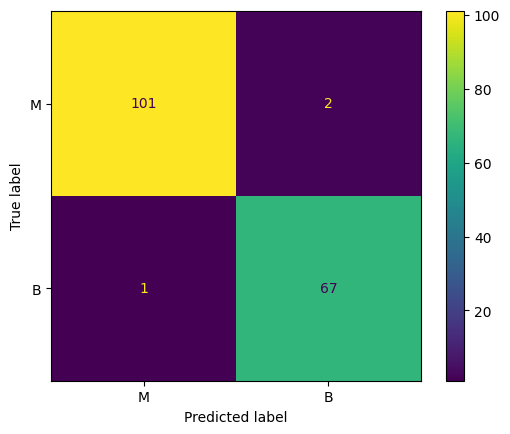

In [98]:
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['M','B'])
cmd.plot()
plt.show()

Mallia testattiin eri k:n arvoilla ja parhaimman tarkkuuden antava arvo otettiin käyttöön
<br><br>
K:n arvolla 3 
<br><br>
accuracy = 0.98<br>
precicion = 0.97<br>
recall 0.99

# 6. Lopputulos


Lopullinen tarkkuus mallille on hyvä. Ottaen huomioon, että datassa oli paljon soluja ja vain 569 riviä dataa, josta 30% ei käytetty mallin kouluttamiseen vaan pelkästään testaamiseen.